In [1]:
import tensorflow as tf

In [71]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

In [75]:
# This is needed to display the images.
%matplotlib inline
%pylab inline

# This is needed since the notebook is stored in the competition folder.
sys.path.append('../../models/')

Populating the interactive namespace from numpy and matplotlib


In [17]:
from utils import label_map_util

from utils import visualization_utils as vis_util

In [62]:
PATH_TO_MODEL = 'model/frozen_inference_graph.pb'
PATH_TO_TEST_IMAGES_DIR = 'images/'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'nexar_label_map.pbtxt'
NUM_CLASSES = 5
NB_IMAGES = 10

In [50]:
tf.reset_default_graph()
# Load the graph
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [52]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [54]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [64]:
image_paths = [os.path.join(PATH_TO_TEST_IMAGES_DIR, img) for img in os.listdir(PATH_TO_TEST_IMAGES_DIR)][:NB_IMAGES]
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

images/000196c0-1985-457f-bcd2-e4df621de5fe.mov-0001.jpg


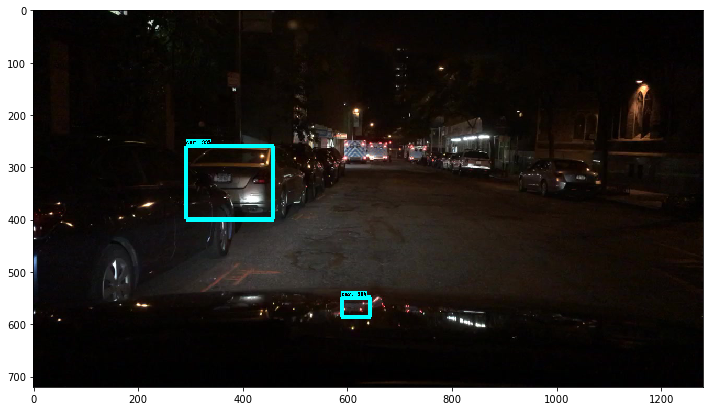

images/0012c298-4ec3-4604-a8f5-b828f1775ce6.mov-0001.jpg


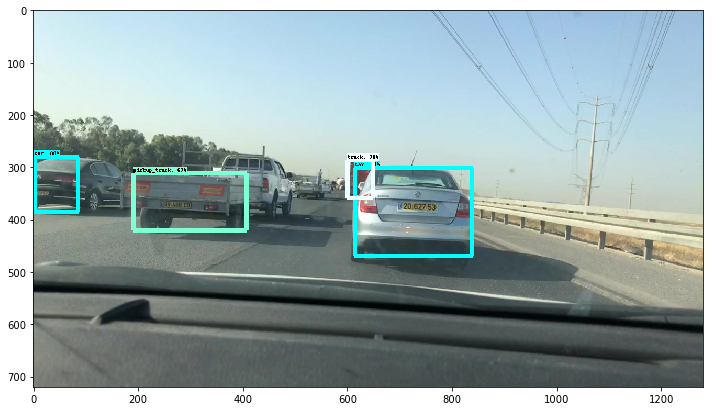

images/00146c1b-7af9-4864-9066-9b32913a1c3f.mov-0001.jpg


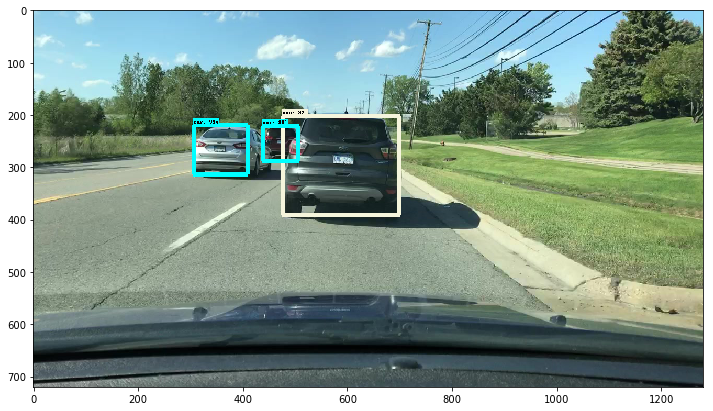

images/001b630b-1e07-447a-9706-6c0f7aa3c811.mov-0001.jpg


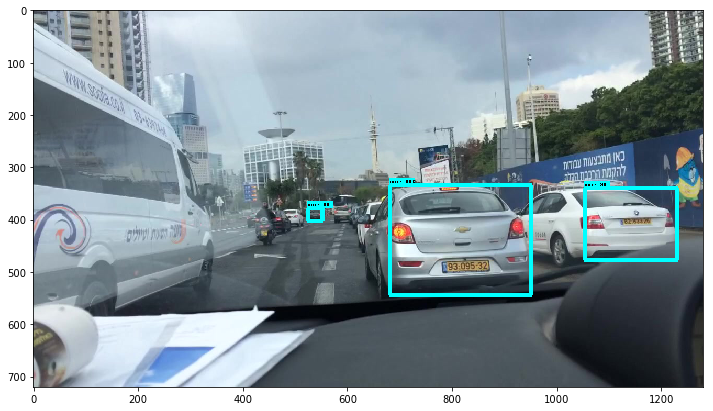

In [ ]:
# here we go
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    for image_path in image_paths:
      print(image_path)
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
      # Each box represents a part of the image where a particular object was detected.
      boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
      # Each score represent how level of confidence for each of the objects.
      # Score is shown on the result image, together with the class label.
      scores = detection_graph.get_tensor_by_name('detection_scores:0')
      classes = detection_graph.get_tensor_by_name('detection_classes:0')
      num_detections = detection_graph.get_tensor_by_name('num_detections:0')
      # Actual detection.
      (boxes, scores, classes, num_detections) = sess.run(
          [boxes, scores, classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)
      plt.show()